Here are **complete, structured notes on Vector Databases** focusing on **FAISS** and **ChromaDB**, with explanations + architecture + comparison + practical Python examples.

---

# 🔷 1️⃣ What is a Vector Database?

A **Vector Database** stores high-dimensional numerical vectors (embeddings) and allows:

* Fast similarity search
* Semantic search
* Nearest Neighbor Search (ANN)
* Used in AI apps (RAG, Chatbots, Search Engines)

Instead of searching by keywords, we search by **meaning** using embeddings.

Example:

```
"Machine learning is amazing"
→ [0.234, -0.545, 0.876, ...]   (vector)
```

These vectors are generated using embedding models like:

* OpenAI
* Hugging Face
* Google

---

# 🔷 2️⃣ What is FAISS?

## 📌 Definition

Meta AI created **FAISS** (Facebook AI Similarity Search).

FAISS = **Fast Approximate Nearest Neighbor Search Library**

It is:

* Library (not full DB)
* Highly optimized
* Supports GPU
* Best for large-scale vector search

---

## 🔷 FAISS Architecture

```
Text → Embedding Model → Vectors → FAISS Index → Similarity Search
```

FAISS does NOT:

* Store metadata
* Provide REST API
* Provide persistence by default

You manage storage manually.

---

## 🔷 FAISS Index Types

| Index Type   | Use Case             |
| ------------ | -------------------- |
| IndexFlatL2  | Exact search         |
| IndexIVFFlat | Approximate search   |
| IndexHNSW    | Graph-based search   |
| IndexPQ      | Product quantization |

---

# 🔷 FAISS Example (Python)

### Step 1: Install

```bash
pip install faiss-cpu
```

### Step 2: Code Example

```python
import faiss
import numpy as np

# Create random vectors
dimension = 4
vectors = np.array([
    [1.0, 2.0, 3.0, 4.0],
    [2.0, 3.0, 4.0, 5.0],
    [10.0, 10.0, 10.0, 10.0]
]).astype('float32')

# Create index
index = faiss.IndexFlatL2(dimension)

# Add vectors
index.add(vectors)

# Query vector
query = np.array([[1.0, 2.0, 3.0, 4.0]]).astype('float32')

# Search
k = 2
distances, indices = index.search(query, k)

print("Indices:", indices)
print("Distances:", distances)
```

---

## 🔷 FAISS Advantages

✅ Extremely fast
✅ GPU support
✅ Best for billion-scale data
✅ Used in production at scale

## 🔷 FAISS Limitations

❌ No built-in metadata
❌ No document storage
❌ Not beginner-friendly
❌ No API layer

---

# 🔷 3️⃣ What is ChromaDB?

## 📌 Definition

ChromaDB is an **open-source vector database** built specifically for LLM applications.

Unlike FAISS:

* It stores embeddings + metadata
* It stores documents
* Easy to use
* Persistent by default

Best for:

* RAG systems
* Chatbots
* AI apps
* Local LLM projects

---

## 🔷 ChromaDB Architecture

```
Text → Embedding Model → Chroma Collection
                        ↳ Embeddings
                        ↳ Metadata
                        ↳ Documents
```

Chroma stores:

* ids
* documents
* embeddings
* metadata

---

# 🔷 ChromaDB Example (Python)

### Step 1: Install

```bash
pip install chromadb
```

---

### Step 2: Basic Example

```python
import chromadb

# Create client
client = chromadb.Client()

# Create collection
collection = client.create_collection(name="my_collection")

# Add documents
collection.add(
    documents=["Machine learning is great", 
               "Deep learning uses neural networks"],
    metadatas=[{"topic": "ml"}, {"topic": "dl"}],
    ids=["1", "2"]
)

# Query
results = collection.query(
    query_texts=["What is deep learning?"],
    n_results=1
)

print(results)
```

---

# 🔷 ChromaDB with Persistent Storage

```python
client = chromadb.PersistentClient(path="./chroma_db")
```

Now data is saved to disk.

---

# 🔷 ChromaDB Advantages

✅ Stores metadata
✅ Stores documents
✅ Beginner-friendly
✅ Built for LLM apps
✅ Persistence support
✅ Easy integration with LangChain

---

# 🔷 ChromaDB Limitations

❌ Slower than FAISS at very large scale
❌ Not ideal for billion-scale search
❌ Less low-level control

---

# 🔷 4️⃣ FAISS vs ChromaDB Comparison

| Feature          | FAISS                    | ChromaDB       |
| ---------------- | ------------------------ | -------------- |
| Type             | Library                  | Full Vector DB |
| Created by       | Meta AI                  | Chroma Team    |
| Metadata Support | ❌                        | ✅              |
| Persistence      | Manual                   | Built-in       |
| GPU Support      | ✅                        | Limited        |
| Scale            | Billion+ vectors         | Small–Medium   |
| Best For         | High performance systems | RAG apps       |

---

# 🔷 5️⃣ When to Use What?

### 🔹 Use FAISS if:

* You need high performance
* You have huge dataset
* You build custom backend
* You want GPU acceleration

### 🔹 Use ChromaDB if:

* You build chatbot
* You build RAG
* You use LangChain
* You want easy setup

---

# 🔷 7️⃣ FAISS + LangChain Example

```python
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

texts = ["AI is future", "ML is subset of AI"]

db = FAISS.from_texts(texts, embeddings)

results = db.similarity_search("What is AI?")
print(results)
```

---

# 🔷 8️⃣ Chroma + LangChain Example

```python
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

db = Chroma.from_texts(
    ["AI is powerful", "Deep learning is part of AI"],
    embeddings
)

results = db.similarity_search("Explain AI")
print(results)
```

---

# 🔷 Final Summary

| FAISS                | ChromaDB          |
| -------------------- | ----------------- |
| Performance focused  | LLM focused       |
| Low-level control    | Easy to use       |
| No metadata          | Metadata support  |
| Best for large-scale | Best for RAG apps |

---

# ❓ Why not use a Traditional Database to store embeddings instead of a Vector Database?

Traditional databases are optimized for structured data and exact queries, not high-dimensional similarity search.
Embeddings require fast nearest neighbor search using ANN algorithms, which traditional databases do not support efficiently.

Vector databases are specifically built to handle high-dimensional vectors, provide optimized indexing, and scale to millions or billions of embeddings with low latency.

That’s why for AI applications like semantic search and RAG, vector databases are preferred.

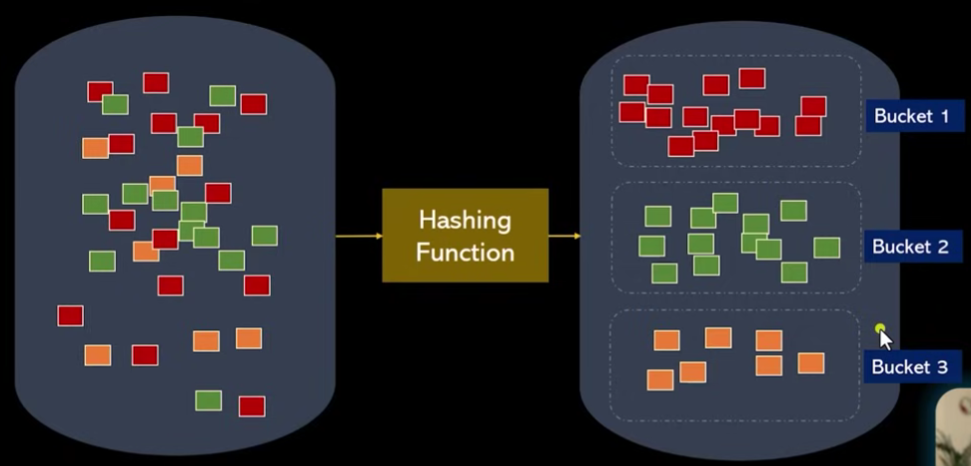

### so as shown in picture if we store embbeding in traditinal db as 1st diagram in picture it has millions of data so from fecting that data requires lot of computational power and also time like normal queries we are using to fetch data from db , so solve this issue vector db contains bucket like structure as shown in 2nd diagram so due to this fast search of embbedings possible by going to one specific bucket as per requirement no need to search in millions of data , so this makes fast retrival of query

---

Here are the **most asked interview questions on Vector Databases (FAISS & ChromaDB)** with **clear 2-minute answers** you can speak confidently in interviews.

# 🔷 1️⃣ What is a Vector Database?

A vector database stores high-dimensional numerical vectors called embeddings and allows fast similarity search.

Instead of keyword matching, it finds results based on semantic similarity using distance metrics like cosine similarity or L2 distance.

It is mainly used in:

* Semantic search
* Recommendation systems
* RAG (Retrieval Augmented Generation)
* Chatbots

Embeddings are generated using models from companies like OpenAI or Hugging Face.

---

# 🔷 2️⃣ What is FAISS?

Meta AI developed FAISS (Facebook AI Similarity Search).

FAISS is a high-performance library for efficient similarity search on large vector datasets.

Key points:

* Supports Approximate Nearest Neighbor (ANN)
* GPU acceleration available
* Highly optimized for billion-scale vectors
* Does NOT store metadata or documents

It is ideal for large-scale production systems where performance is critical.

---

# 🔷 3️⃣ What is ChromaDB?

ChromaDB is an open-source vector database built specifically for LLM applications.

Unlike FAISS:

* Stores embeddings + metadata + documents
* Has built-in persistence
* Easy integration with LangChain
* Beginner-friendly

It is mainly used for:

* RAG systems
* AI assistants
* Local LLM projects

---

# 🔷 4️⃣ What is the difference between FAISS and ChromaDB?

FAISS is a low-level similarity search library optimized for speed and large-scale datasets.

ChromaDB is a full vector database that stores embeddings, documents, and metadata.

FAISS is best for performance-heavy systems, while ChromaDB is best for building RAG applications quickly.

---

# 🔷 5️⃣ What is Approximate Nearest Neighbor (ANN)?

ANN is a technique used to quickly find vectors that are close to a query vector without checking every vector.

Exact search checks all vectors, which is slow for large datasets.

ANN sacrifices a little accuracy for much faster performance using techniques like:

* IVF (Inverted File Index)
* HNSW (Hierarchical Navigable Small World)
* PQ (Product Quantization)

This is essential when working with millions or billions of vectors.

---

# 🔷 6️⃣ What distance metrics are used in vector databases?

Common distance metrics:

* L2 Distance (Euclidean Distance)
* Cosine Similarity
* Inner Product

Cosine similarity is most commonly used in NLP applications because it measures directional similarity between vectors.

---

# 🔷 7️⃣ How does Vector DB work in RAG architecture?

Flow:

User Query
→ Convert to embedding
→ Search similar vectors in DB
→ Retrieve relevant documents
→ Send to LLM
→ Generate final answer

This approach is widely used in AI systems built using models from OpenAI.

---

# 🔷 8️⃣ Why is FAISS fast?

FAISS is fast because:

* Uses optimized C++ backend
* Supports GPU acceleration
* Uses advanced indexing techniques like IVF and HNSW
* Uses quantization to reduce memory usage

It avoids scanning the entire dataset.

---

# 🔷 9️⃣ What are FAISS index types?

Common types:

* IndexFlatL2 → Exact search
* IndexIVFFlat → Approximate search
* IndexHNSW → Graph-based search
* IndexPQ → Compressed search

Choice depends on speed vs accuracy tradeoff.

---

# 🔷 🔟 What are real-world applications of Vector DB?

* Chatbots
* Semantic search engines
* Recommendation systems
* Image search
* Fraud detection
* Question answering systems

Large tech companies use vector search in AI systems, including Google and Microsoft.

---

# 🔷 1️⃣1️⃣ What challenges exist in vector databases?

* High memory usage
* Choosing correct index type
* Tradeoff between speed and accuracy
* Scaling to billions of vectors
* Maintaining real-time updates

---

# 🔷 1️⃣2️⃣ When should you use FAISS vs ChromaDB?

Use FAISS:

* When performance is priority
* For large-scale search
* When building custom backend

Use ChromaDB:

* When building RAG
* Need metadata support
* Want quick development
* Using LangChain

---
